In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
df = pd.read_csv('experience.csv')
df.info()
x = df['YearsExperience']
y = df['Salary']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [3]:
x= x.values
x = x.reshape(-1,1)

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
model.predict([[10.1]])

#for 10.1 years of experience it is predicting 121236 salary

array([121236.81964536])

In [6]:
c = model.coef_

In [7]:
c

array([9449.96232146])

In [8]:
c*1.1

array([10394.9585536])

In [9]:
b = model.predict([[0]])
b
#bias

#OR

array([25792.20019867])

In [10]:
model.intercept_



25792.20019866871

In [11]:
#Formula  => y = b + c * x

b+c*1.1

array([36187.15875227])

In [12]:
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [13]:
from sklearn.externals import joblib

/Users/ankit/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [14]:
import joblib

In [15]:
joblib.dump(model, 'salary.pk1')

['salary.pk1']

In [16]:
import joblib
#using the saved model

In [17]:
model = joblib.load('salary.pk1')

In [18]:
model.predict([[1.1]])

array([36187.15875227])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [21]:
model=LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.predict([[9.6]])

array([117407.49330827])

In [28]:
y_predict=model.predict(x_test)
y_predict

array([ 72957.62211074, 111733.04166604,  69174.65434924,  82415.04151447,
        61608.71882626,  54042.78330327,  74849.10599148,  93763.94479895,
       116461.7513679 ])

In [32]:
y_pred = y_test

Text(0.5, 0, 'Years of exp')

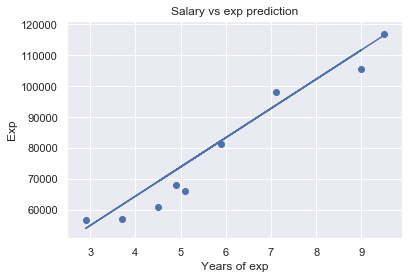

In [38]:
plt.plot(x_test, y_predict) #predicted data points
plt.scatter(x_test, y_pred) #original datapoints
plt.title('Salary vs exp prediction')
plt.ylabel('Exp')
plt.xlabel('Years of exp')